<a href="https://colab.research.google.com/github/jagatabhay/TSAI/blob/master/S12/TestingScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget cq http://cs231n.stanford.edu/tiny-imagenet-200.zip

import zipfile
with zipfile.ZipFile('tiny-imagenet-200.zip','r') as my_zip:
     my_zip.extractall()

--2020-06-27 18:28:00--  http://cq/
Resolving cq (cq)... failed: Name or service not known.
wget: unable to resolve host address ‘cq’
--2020-06-27 18:28:00--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  20.3MB/s    in 15s     

2020-06-27 18:28:16 (15.9 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]

FINISHED --2020-06-27 18:28:16--
Total wall clock time: 15s
Downloaded: 1 files, 237M in 15s (15.9 MB/s)


In [2]:
import os

files = folders = 0

for _, dirnames, filenames in os.walk('tiny-imagenet-200/train'):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print('Files :',files)
print('Folder :',folders)

Files : 100200
Folder : 400


In [3]:
files = folders = 0

for _, dirnames, filenames in os.walk('tiny-imagenet-200/val'):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print('Files :',files)
print('Folder :',folders)

Files : 10001
Folder : 1


In [3]:
import random

image_path = 'tiny-imagenet-200'
class_ids = [line.strip() for line in open(image_path + '/wnids.txt','r')]
id_dict = { x : i for i , x in enumerate(class_ids)}
all_classes = { line.split('\t')[0] : line.split('\t')[1].strip() 
                 for line in open(image_path+'/words.txt' , 'r' )
                 }
class_name = [ all_classes[x] for x in class_ids ]

images = []
labels = []

#for Train Folder Data
for value , key in enumerate(class_ids):
  images += [f'{image_path}/train/{key}/images/{key}_{i}.JPEG' for i in range(500) ]
  labels += [ value for i in range(500) ]


#for Val Folder Data
for line in open(image_path+'/val/val_annotations.txt','r'):
  img_name , class_id = line.split('\t')[:2]
  images.append(f'{image_path}/val/images/{img_name}')
  labels.append(id_dict[class_id])

dataset = list(zip(images,labels))
random.shuffle(dataset)

In [5]:
from torch.utils.data import DataLoader
import torch

tensor_dataset = torch.FloatTensor(dataset)
train_loader = DataLoader(dataset =tensor_dataset , 
                          batch_size = 128 , 
                          shuffle = True , 
                          num_workers = 4 , 
                          pin_memory = True)

In [4]:
os.makedirs('TinyImageNet')
os.makedirs('TinyImageNet/train')
os.makedirs('TinyImageNet/test')
os.makedirs('TinyImageNet/val')

In [5]:
import shutil


for classes in os.listdir('tiny-imagenet-200/train'):
  os.makedirs('TinyImageNet/train/'+classes)
  for images in os.listdir('tiny-imagenet-200/train/'+classes+'/images'):
    shutil.move('tiny-imagenet-200/train/'+classes+'/images/'+images,'TinyImageNet/train/'+classes)



print('Train Data Transfer successfully')

val_class = []

for line in open('tiny-imagenet-200/val/val_annotations.txt','r'):
  img_name , class_id = line.split('\t')[:2]
  val_class.append(class_id)


val_class = list(set(val_class))


for i in val_class:
  os.makedirs(f'TinyImageNet/val/{i}')


for line in open('tiny-imagenet-200/val/val_annotations.txt','r'):
  img_name , class_id = line.split('\t')[:2]
  shutil.move(f'tiny-imagenet-200/val/images/{img_name}',f'TinyImageNet/val/{class_id}')


print('Val Data Transfer successfully')

Train Data Transfer successfully
Val Data Transfer successfully


In [6]:
files = folders = 0

for _, dirnames, filenames in os.walk('TinyImageNet/train'):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print('Files :',files)
print('Folder :',folders)

Files : 100000
Folder : 200


In [7]:
files = folders = 0

for _, dirnames, filenames in os.walk('TinyImageNet/val'):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print('Files :',files)
print('Folder :',folders)

Files : 10000
Folder : 200


In [8]:
files = folders = 0

for _, dirnames, filenames in os.walk('tiny-imagenet-200/train'):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print('Files :',files)
print('Folder :',folders)

Files : 200
Folder : 400


In [9]:
files = folders = 0

for _, dirnames, filenames in os.walk('tiny-imagenet-200/val'):
  # ^ this idiom means "we won't be using this value"
    files += len(filenames)
    folders += len(dirnames)

print('Files :',files)
print('Folder :',folders)

Files : 1
Folder : 1


In [11]:
train_dir = 'TinyImageNet/train'
val_dir = 'TinyImageNet/val'

from torchvision import transforms , datasets
import torch

train_transform = transforms.Compose([transforms.RandomRotation(30),
                                     transforms.RandomHorizontalFlip(p = 0.5),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.4802, 0.4481, 0.3975),
                                                          (0.2302, 0.2265, 0.2262)
                                                          )])


test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.4802, 0.4481, 0.3975),
                                                          (0.2302, 0.2265, 0.2262)
                                                          )])

In [12]:
train_datasets = datasets.ImageFolder( train_dir ,transform = train_transform )
trainloader = torch.utils.data.DataLoader(train_datasets, 
                                          batch_size = 256 , 
                                          shuffle = True , 
                                          num_workers = 4 ,
                                          pin_memory = True)

test_datasets = datasets.ImageFolder( val_dir ,transform = test_transform )
testloader = torch.utils.data.DataLoader(test_datasets, 
                                          batch_size = 256 , 
                                          shuffle = True , 
                                          num_workers = 4 ,
                                          pin_memory = True)

In [ ]:
class_name = image_datasets.classes
print(class_name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


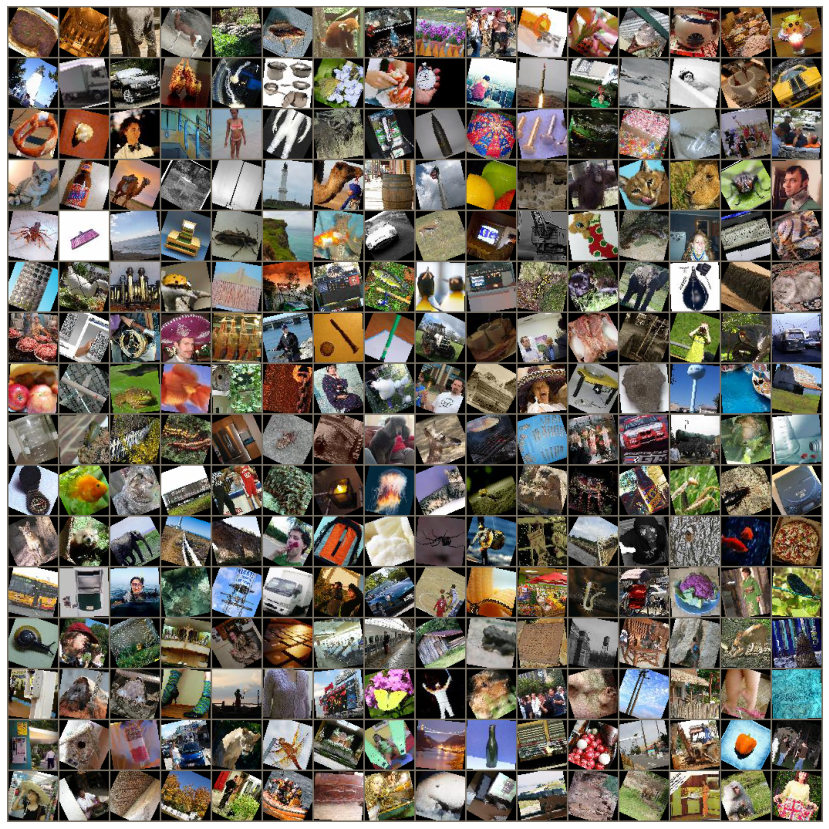

In [13]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np

def imshow(image):
  if isinstance(image , torch.Tensor):
    image = image.numpy().transpose(( 1, 2, 0 ))
  else:
    image = np.array(image).transpose((1 , 2, 0 ))

  #UnNormalize
  mean = np.array([0.4802, 0.4481, 0.3975])
  std = np.array([(0.2302, 0.2265, 0.2262)])
  image = std*image + mean
  
  #plot
  fig , ax = plt.subplots(1 , 1 , figsize = (15,15) )
  plt.imshow(image)
  ax.axis('off')


images , _ = next(iter(trainloader))
out = torchvision.utils.make_grid(images , nrow = 16 )
imshow(out) 

In [14]:
!git clone https://github.com/jagatabhay/TSAI.git

Cloning into 'TSAI'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 557 (delta 5), reused 0 (delta 0), pack-reused 541
Receiving objects: 100% (557/557), 2.54 MiB | 1.35 MiB/s, done.
Resolving deltas: 100% (300/300), done.


In [15]:
from TSAI.S12 import resnet
model , device = resnet.resnet18(num_classes = 200)

Device Load :  cuda
Class Loaded Successfully 


In [16]:
import torch.nn as nn 
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001 , momentum = 0.9  , weight_decay = 0.0001 )

In [ ]:
for epoch in range(5):  # loop over the dataset multiple times
        
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data[0].to(device),data[1].to(device)
            
            # zero the parameter gradients
            optimizer.zero_grad()
            
            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            
            optimizer.step()
            #scheduler_.step()
            
            # print statistics
            running_loss += loss.item()
            #minibatch = 50000//batchsize
            if i % 100 == 99 :    # print every 2000 mini-batches
               print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 99 ))
               running_loss = 0.0


    
print('INFO : Finished Training of Dataset ') 

[1,   100] loss: 5.262
[1,   200] loss: 4.936
[1,   300] loss: 4.718
[2,   100] loss: 4.462
[2,   200] loss: 4.363
[2,   300] loss: 4.264
[3,   100] loss: 4.086
[3,   200] loss: 4.001
[3,   300] loss: 3.935


In [18]:
    correct = 0
    total = 0
    with torch.no_grad():
          for data in testloader:
               images , labels = data[0].to(device) , data[1].to(device)
               output = model(images)
               _ , predicted = torch.max(output.data, 1)
               total += labels.size(0)
               correct += (predicted == labels).sum().item()
     
     
     
    print('Accuracy of the Network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the Network on the 10000 test images: 21 %
